<a href="https://colab.research.google.com/github/Yoanvari/PCVK2024/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 11: Object Detection

Nama  : Muhammad Yoanvari Al Farizi

NIM   : 2241720096

Kelas : TI-3D

## Object Detection
Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Template Matching

Menggunakan library openCV:

__cv.matchTemplate()__, dengan parameter:
* __image__: citra input
* __templ__: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
* __method__: metode dari template matching

Jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

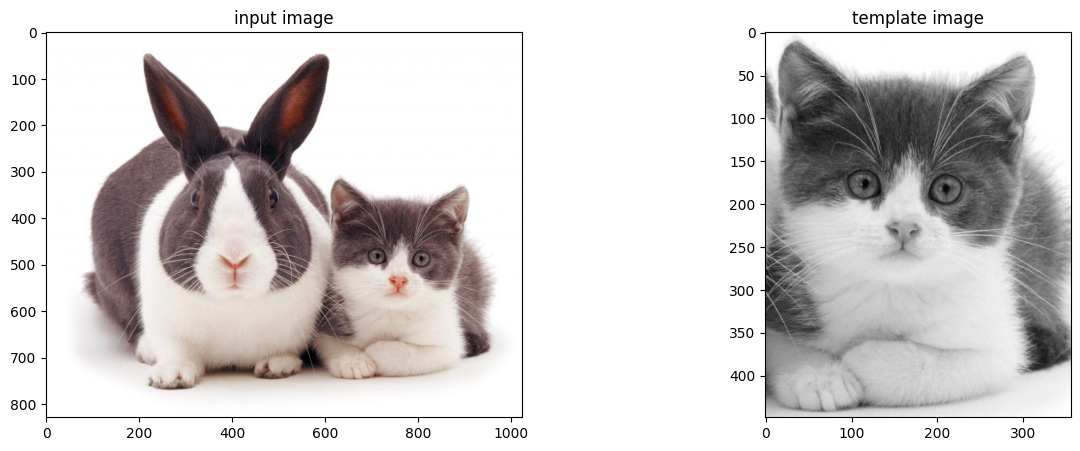

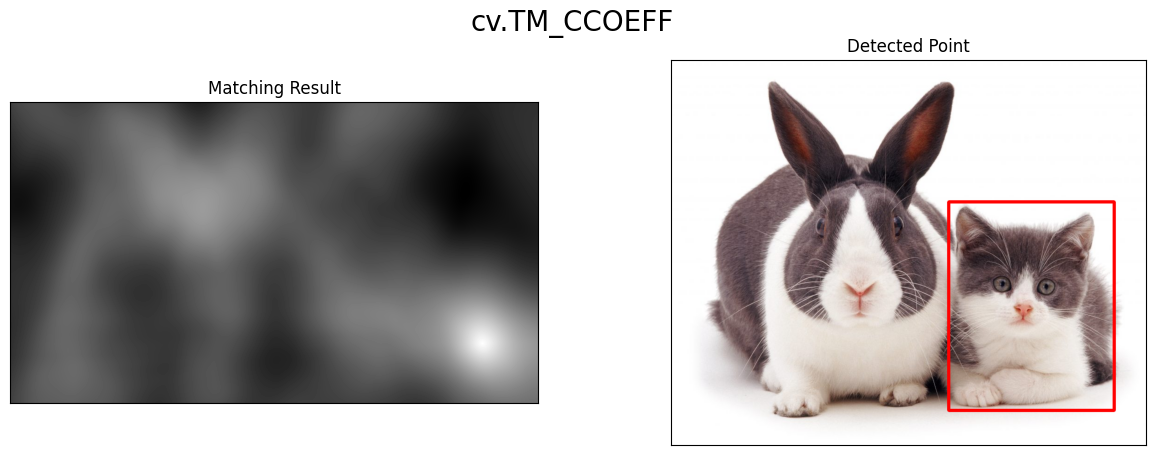

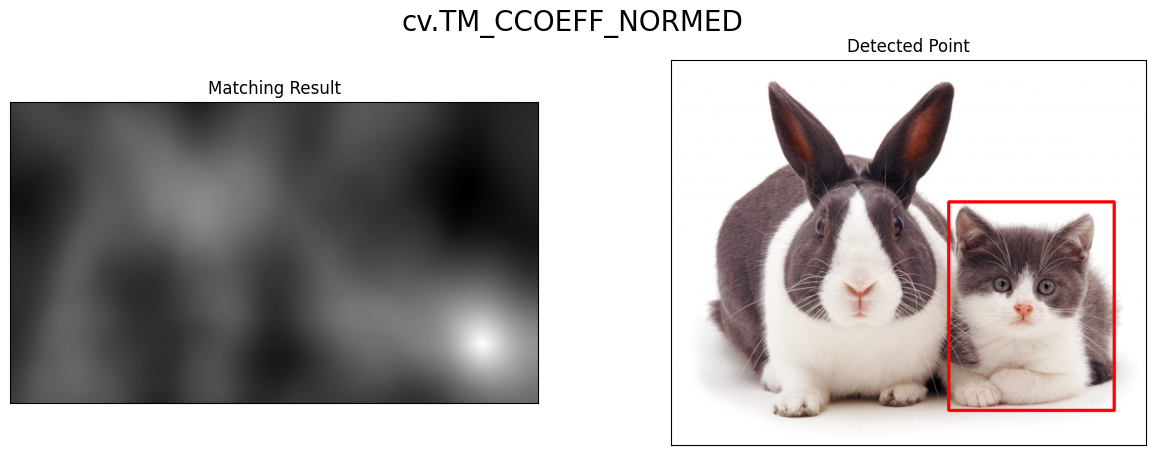

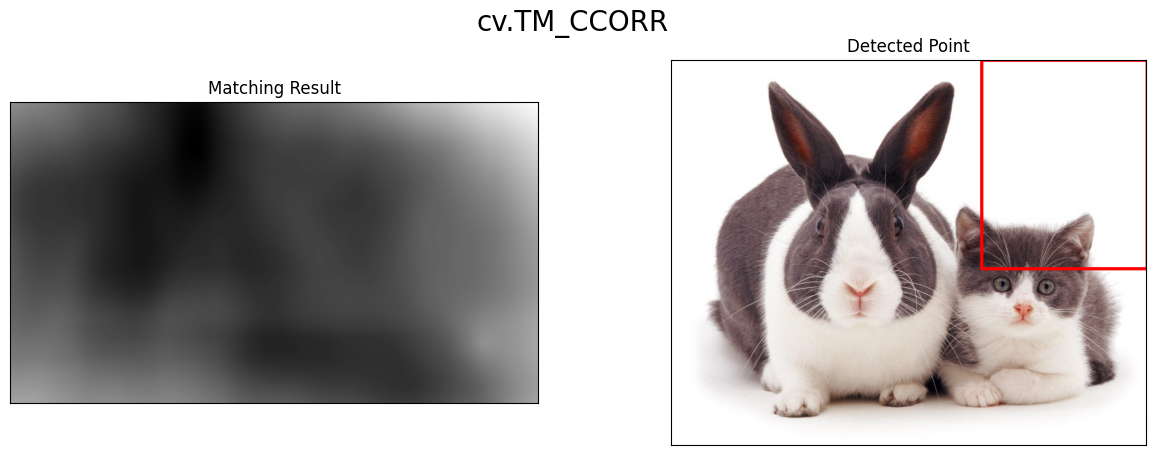

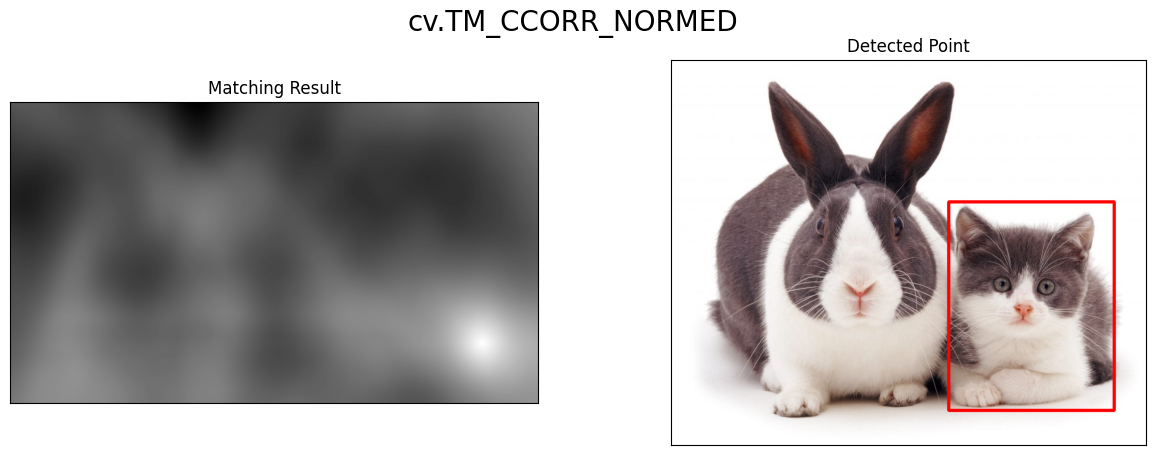

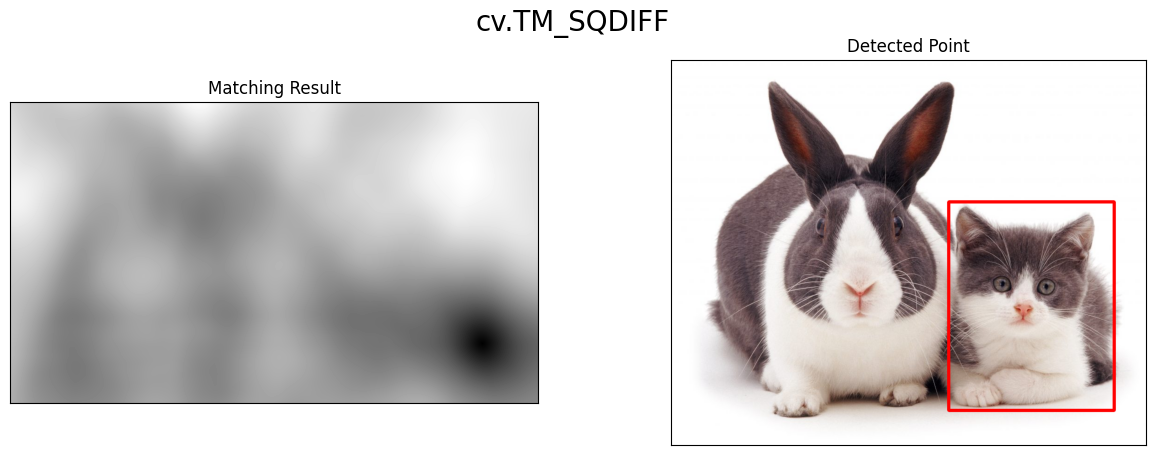

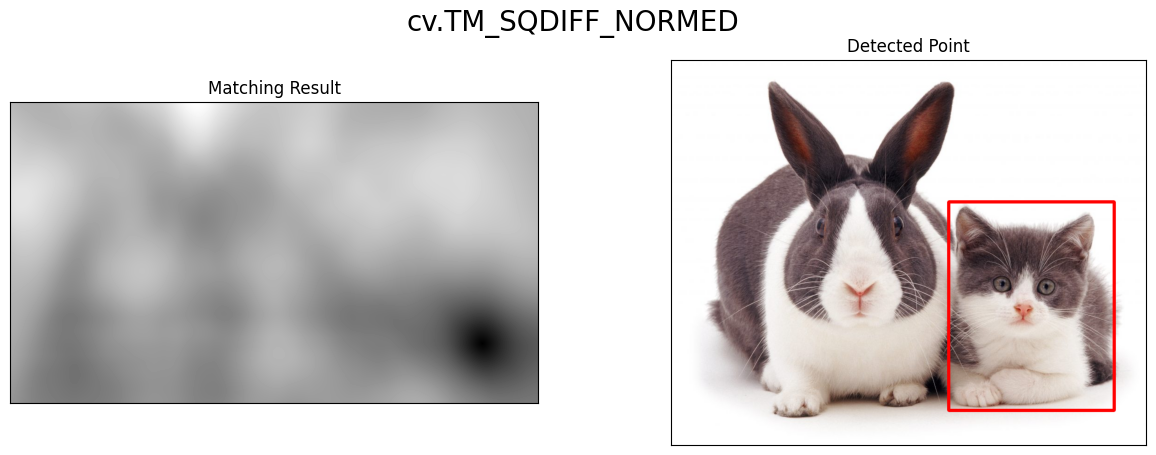

In [8]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/cats_and_bunnies.jpg')
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image_copy = image.copy()
template = cv.imread('/content/drive/MyDrive/PCVK/image/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Daftar Metode yang digunakan
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = image_copy.copy()
    method = eval(meth)
  # Apply template Matching
    res = cv.matchTemplate(gray_image,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
  # jika method yang dijalankan TM_SQDIFF atau TM_SQDIFF_NORMED, menggunakan nilai minimum
  # jika bukan maka memilih nilai maks
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255),6)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

### Template Matching untuk Multiple Object

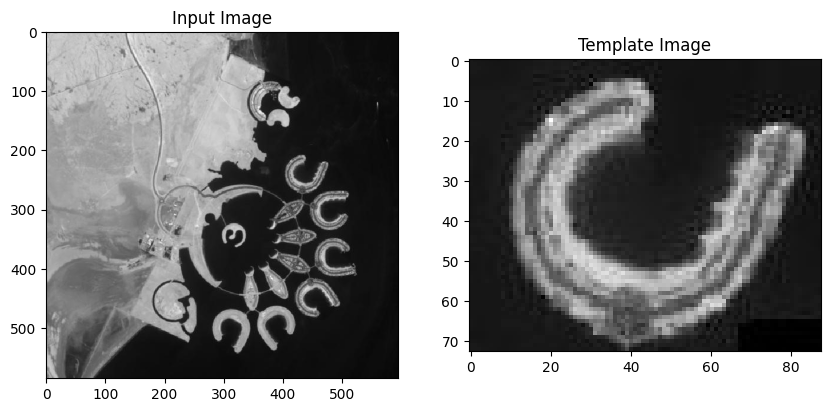

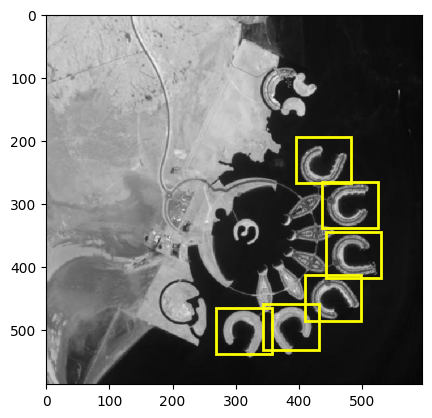

Jumlah objek yang cocok: 6


In [15]:
from skimage.feature import match_template
from scipy.ndimage import maximum_filter

# Memuat gambar dan template
image_bahrain = cv.imread('/content/drive/MyDrive/PCVK/image/bahrain.jpg')
template_bahrain = cv.imread('/content/drive/MyDrive/PCVK/image/bahrain-template.jpg')

# Konversi gambar dan template ke grayscale
image_bahrain = cv.cvtColor(image_bahrain, cv.COLOR_BGR2GRAY)
template_bahrain = cv.cvtColor(template_bahrain, cv.COLOR_BGR2GRAY)

# Tampilkan gambar input dan template
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(image_bahrain, cmap='gray'), axarr[0].set_title("Input Image")
axarr[1].imshow(template_bahrain, cmap='gray'), axarr[1].set_title("Template Image")

# Tentukan ukuran template
h, w = template_bahrain.shape

# Lakukan template matching
res = match_template(image_bahrain, template_bahrain)

# Tentukan threshold
threshold = 0.45
loc = np.where(res >= threshold)

# Non-maximum suppression
dist_threshold = 45
filtered_points = []
for pt in zip(*loc[::-1]):
    if all(np.linalg.norm(np.array(pt) - np.array(fp)) >= dist_threshold for fp in filtered_points):
        filtered_points.append(pt)

# Plot hasil match setelah non-maximum suppression
fig, ax = plt.subplots()
ax.imshow(image_bahrain, cmap=plt.cm.gray)

for pt in filtered_points:
    rec = plt.Rectangle(pt, w, h, edgecolor='yellow', facecolor='none', linewidth=2)
    ax.add_patch(rec)

plt.show()

# Jumlah objek yang cocok
num_matches = len(filtered_points)
print(f"Jumlah objek yang cocok: {num_matches}")

### Metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection

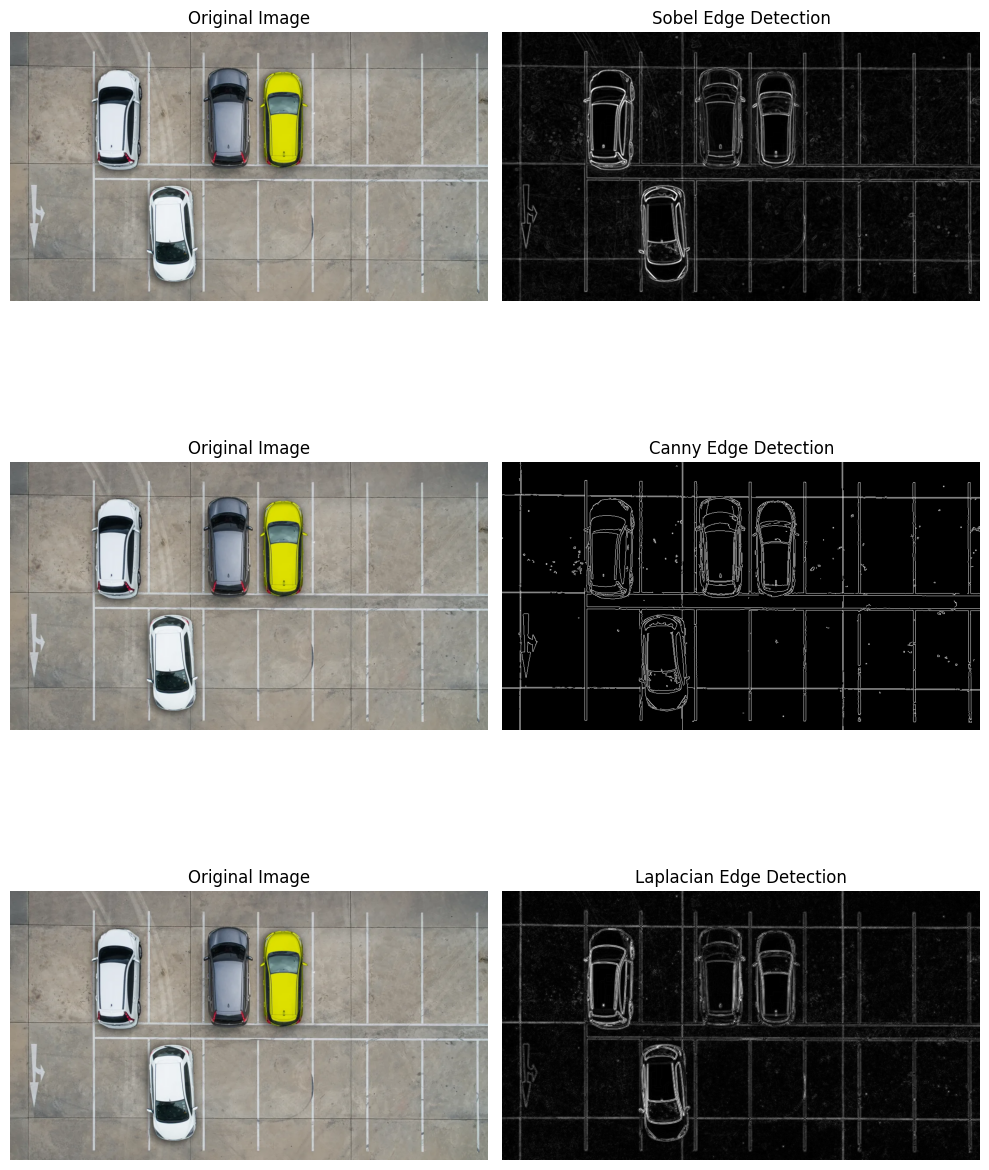

In [20]:
image_path = '/content/drive/MyDrive/PCVK/image/car-park.jpg'
img = cv.imread(image_path)

# Konversi ke grayscale dan hilangkan noise
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.GaussianBlur(gray, (3, 3), 0)

# 1. Sobel Edge Detection
sobelx = cv.Sobel(gray_blur, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(gray_blur, cv.CV_64F, 0, 1, ksize=3)
sobel = cv.addWeighted(cv.convertScaleAbs(sobelx), 0.5, cv.convertScaleAbs(sobely), 0.5, 0)

# 2. Canny Edge Detection
canny_edges = cv.Canny(gray, 100, 200)

# 3. Laplacian Edge Detection
laplacian_edges = cv.Laplacian(gray_blur, ksize=3, ddepth=cv.CV_16S)
laplacian_edges = cv.convertScaleAbs(laplacian_edges)

# Plot layout 3x2
fig, axarr = plt.subplots(3, 2, figsize=(10, 14))

# Baris 1: Original dan Sobel
axarr[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[0, 0].set_title("Original Image")
axarr[0, 0].axis('off')
axarr[0, 1].imshow(sobel, cmap='gray')
axarr[0, 1].set_title("Sobel Edge Detection")
axarr[0, 1].axis('off')

# Baris 2: Original dan Canny
axarr[1, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[1, 0].set_title("Original Image")
axarr[1, 0].axis('off')
axarr[1, 1].imshow(canny_edges, cmap='gray')
axarr[1, 1].set_title("Canny Edge Detection")
axarr[1, 1].axis('off')

# Baris 3: Original dan Laplacian
axarr[2, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[2, 0].set_title("Original Image")
axarr[2, 0].axis('off')
axarr[2, 1].imshow(laplacian_edges, cmap='gray')
axarr[2, 1].set_title("Laplacian Edge Detection")
axarr[2, 1].axis('off')

plt.tight_layout()
plt.show()

### Metode Harris Corner Detection dan Shi-Tomasi Detection

<ipython-input-24-7e15e3f6b863>:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


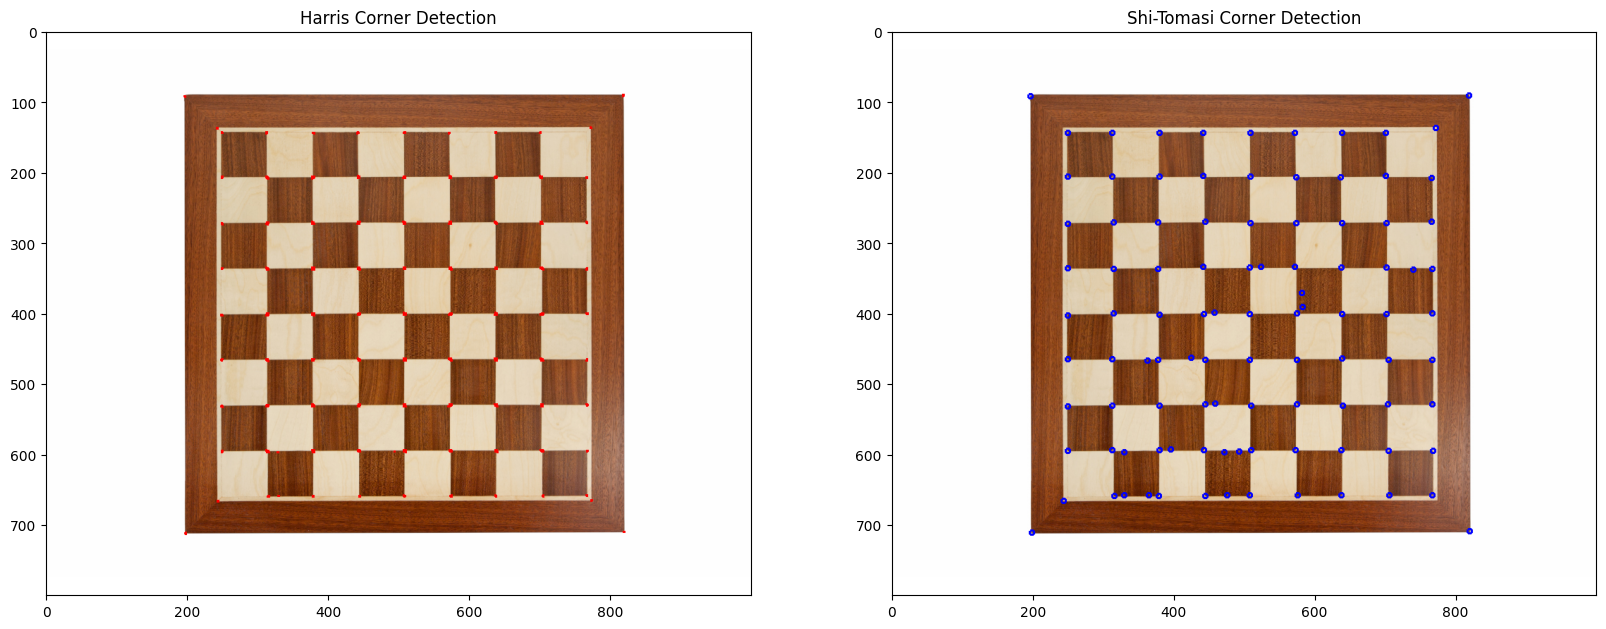

In [24]:
input_img = '/content/drive/MyDrive/PCVK/image/chess-board.jpg'
input_img_harris = cv.imread(input_img)
input_img_shi_tomasi = cv.imread(input_img)

# Konversi ke grayscale
gray_img_harris = cv.cvtColor(input_img_harris, cv.COLOR_BGR2GRAY)
gray_img_shi_tomasi = cv.cvtColor(input_img_shi_tomasi, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
gray_img_harris = np.float32(gray_img_harris)
harris_output = cv.cornerHarris(gray_img_harris, 2, 3, 0.04)
harris_output = cv.dilate(harris_output, None)
input_img_harris[harris_output > 0.01 * harris_output.max()] = [0, 0, 255]

# Shi-Tomasi Corner Detection
corners = cv.goodFeaturesToTrack(gray_img_shi_tomasi, 100, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv.circle(input_img_shi_tomasi, (x, y), 3, (255, 0, 0), 2)

# Plot hasil
fig, axarr = plt.subplots(1, 2, figsize=(20, 10))

# Hasil Harris Corner Detection
axarr[0].imshow(cv.cvtColor(input_img_harris, cv.COLOR_BGR2RGB))
axarr[0].set_title("Harris Corner Detection")

# Hasil Shi-Tomasi Corner Detection
axarr[1].imshow(cv.cvtColor(input_img_shi_tomasi, cv.COLOR_BGR2RGB))
axarr[1].set_title("Shi-Tomasi Corner Detection")

plt.show()

### Metode Hough Transform

number of Hough lines: 33


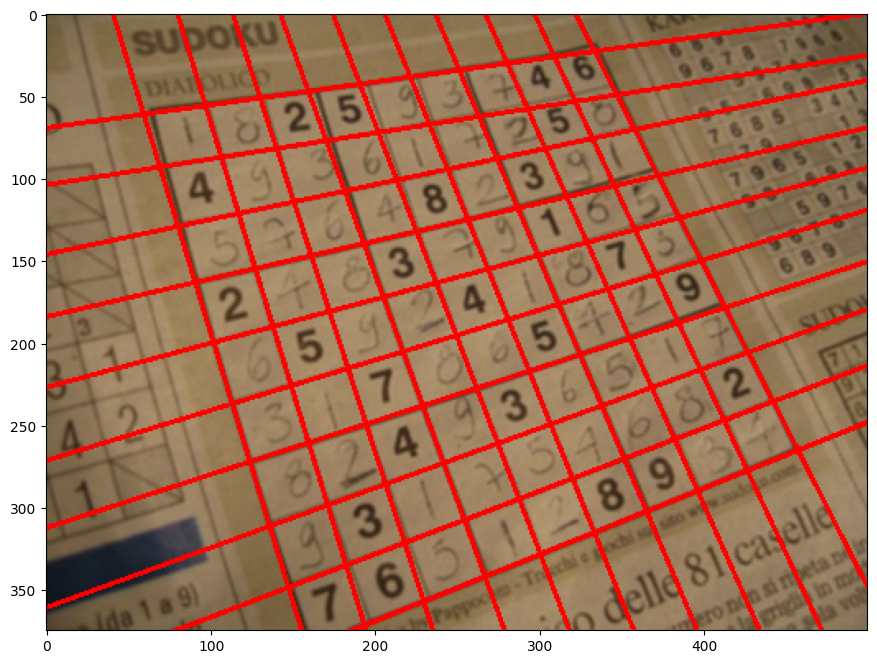

In [27]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/image/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(16,8))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

### Fungsi **findContours()** pada OpenCV untuk contour detection

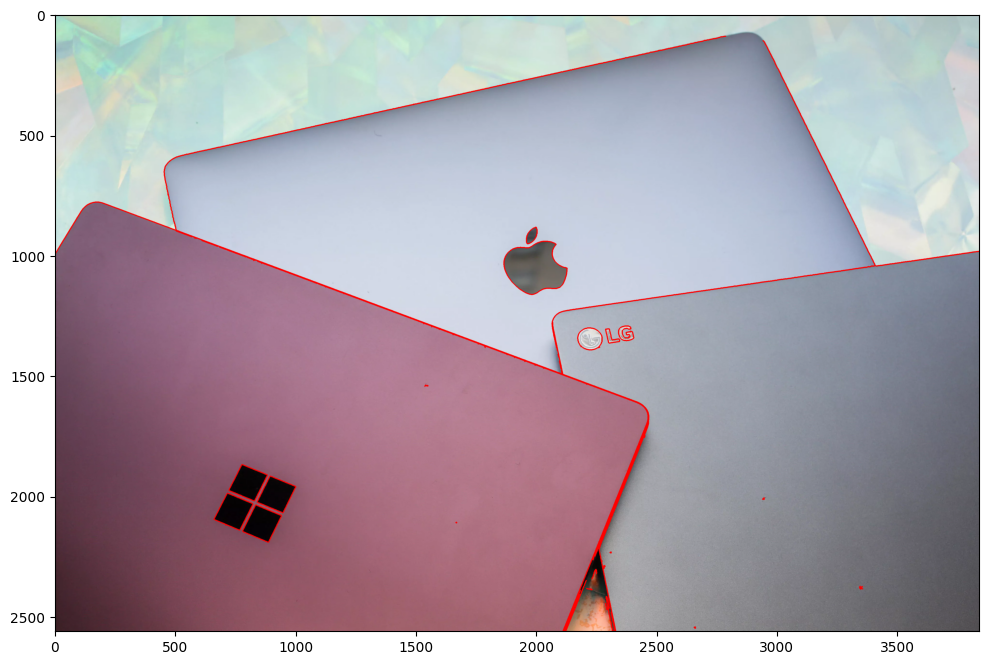

In [29]:
img_laptop = cv.imread('/content/drive/MyDrive/PCVK/image/laptop.jpg')
laptop_gray = cv.cvtColor(img_laptop, cv.COLOR_BGR2GRAY)

# deteksi tepi gambar menggunakan metode canny dengan nilai threshold awal 30 dan akhir 200
edged = cv.Canny(laptop_gray, 30, 200)

#countur dari edge
# cv.RETR_EXTERNAL = mencari kontur paling luar
#cv.CHAIN_APPROX_NONE = tidak melakukan aproksimasi pada titik-titik kontur
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img_laptop, contours, -1, (0,0,255), 3)

plt.figure(figsize=(16,8))
plt.imshow(cv.cvtColor(img_laptop, cv.COLOR_BGR2RGB))

File: ktp_maftuchin.png - Threshold value: 168.0


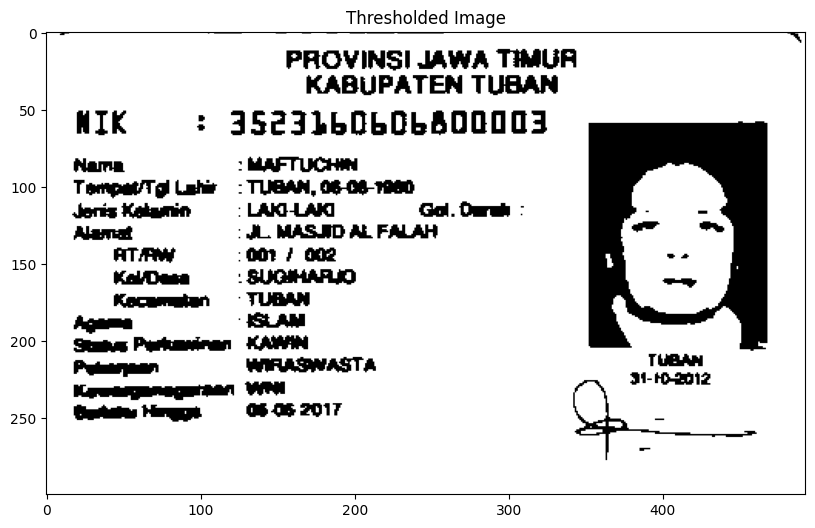

In [52]:
import os
import cv2

path_plate = "/content/drive/MyDrive/PCVK/image/dataset/sliced"

# Looping file di direktori
for ktp in sorted(os.listdir(path_plate)):
    # Baca gambar
    src = cv2.imread(os.path.join(path_plate, ktp))

    # Lakukan pengecekan jika gambar berhasil dibaca
    if src is not None:
        # Salin gambar asli untuk proses filtering dan grayscale
        blurred = src.copy()

        # Filtering menggunakan Gaussian Blur
        for i in range(3):
            blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

        # Ubah gambar menjadi grayscale
        gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

        # Thresholding dengan metode Otsu
        ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Menampilkan hasil
        print(f"File: {ktp} - Threshold value: {ret}")

        # Plot gambar asli, grayscale, dan hasil thresholding
        plt.figure(figsize=(12,6))
        plt.imshow(bw, cmap='gray')
        plt.title("Thresholded Image")

        # Hapus sumbu pada gambar
        for a in ax:
            a.axis("off")

        plt.show()

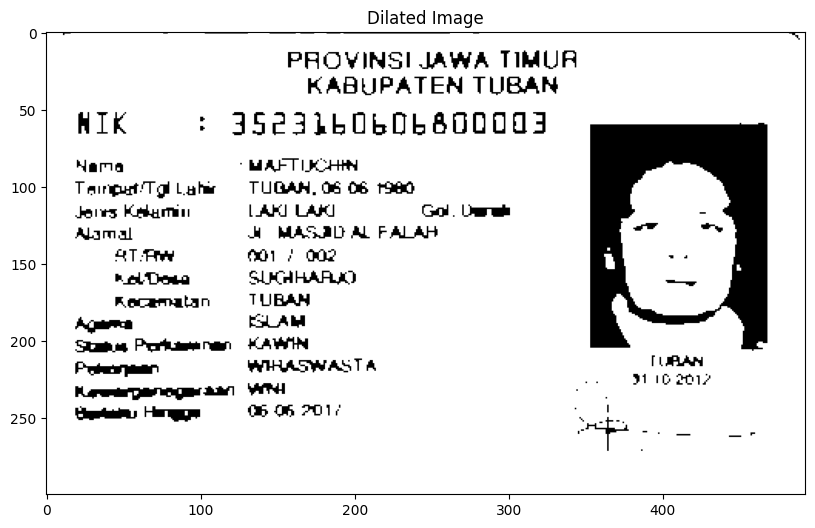

In [73]:
bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Operasi morfologi (dilasi)
kernel = np.ones((2, 2), np.uint8)
dilated = cv2.morphologyEx(bw, cv2.MORPH_DILATE, kernel)

# Menampilkan hasil dilasi
plt.figure(figsize=(12, 6))
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.show()

168.0 (300, 493)


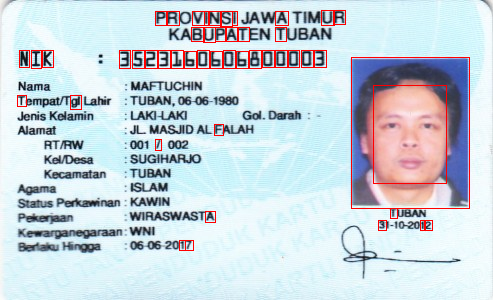

In [77]:
# path file
path_plate = "/content/drive/MyDrive/PCVK/image/dataset/sliced"
# Looping file di direktori
for ktp in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, ktp))
    blurred = src.copy()
    gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# change to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)


contours,  hierarchy= cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


# Contour drawing on the original image
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display images
from google.colab.patches import cv2_imshow
cv2_imshow(src)

156.0 (680, 1055)


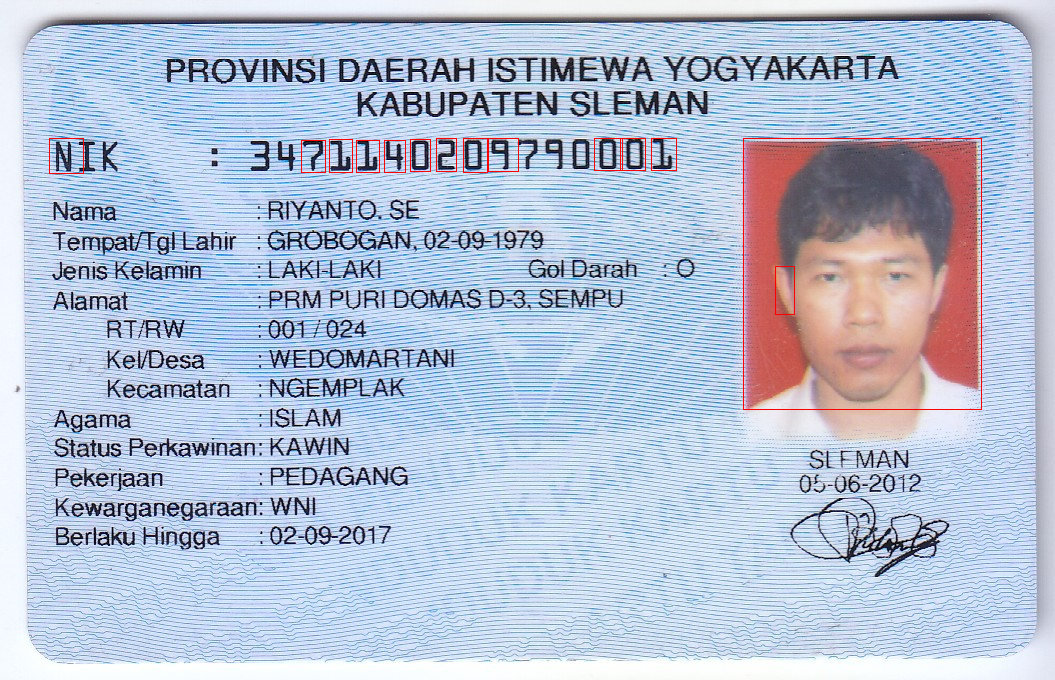

In [98]:
path_plate = "/content/drive/MyDrive/PCVK/image/dataset/sliced"
image = "ktp_riyanto.png"

for ktp in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, image))
    blurred = src.copy()
    gray = blurred.copy()

for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)


contours,  hierarchy= cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 50 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 30 and w >= 0 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cv2_imshow(src)